# Project 2 - Ames Housing Data and Kaggle Challenge

## Part 3 - Model Benchmark

> Benchmark Model Summary
1. Model with all possible features (excluding features ignored due to data quality)
2. Model using LASSO regression taking advantage the model's selection feature.
3. Expected output: a list of features for further tuning.

> Selected Feature for further tuning below:

**Feature**|**Beta**
:-----:|:-----:
overall\_qual|21125.90862
total\_bsmt\_sf|4472.870361
gr\_liv\_area|18519.20008
bsmt\_full\_bath|715.869773
full\_bath|708.268807
fireplaces|2472.700521
garage\_cars|6615.962124
neighborhood|-2202.575907
bldg\_type\_1fam|956.324511
exter\_qual|1823.557199
foundation\_pconc|1602.49542
bsmt\_qual|6313.944549
bsmt\_exposure|4474.63341
heating\_qc|1283.930321
kitchen\_qual|8635.439995
big\_house|-1492.272325

In [18]:
# Import numpy and pandas libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

%matplotlib inline

In [19]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [20]:
# Load Data from Part 2
%store -r X_tr
%store -r X_te
%store -r y_tr
%store -r y_tr_log

### 3.1 Train/Test Split

In [21]:
# Train/test split the training data
X_tr_tr, X_tr_te, y_tr_tr, y_tr_te = train_test_split(X_tr, y_tr, random_state=42)

### 3.2 Scaling/Normalization

In [22]:
# Scale the X_tr_tr
ss = StandardScaler()

# Transform Training and Testing Data
X_tr_tr_sc = ss.fit_transform(X_tr_tr) 
X_tr_te_sc = ss.transform(X_tr_te)
X_te_sc = ss.transform(X_te)

/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
/Users/kaizhao/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


### 3.3 Cross Validation

In [23]:
# Model Initiation
lasso = LassoCV(cv=5)

In [24]:
# Cross Validation
cross_val_score(lasso, X_tr_tr_sc, y_tr_tr, cv=5).mean()

0.9350433232105013

### 3.4 Benchmark Modeling - LASSO Regression with All Features

In [25]:
# Fit Lasso Model
lasso.fit(X_tr_tr_sc, y_tr_tr)

LassoCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
    positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [26]:
# LASSO R2
lasso.score(X_tr_tr_sc, y_tr_tr)

0.9522506421835324

In [27]:
# Predit y using Lasso Model
y_tr_te_pred = lasso.predict(X_tr_te_sc)

In [28]:
# Calculat the residual
resid = y_tr_te - y_tr_te_pred

In [29]:
# Calculate 
RMSE = np.sqrt((resid**2).mean())
RMSE

19001.395956508888

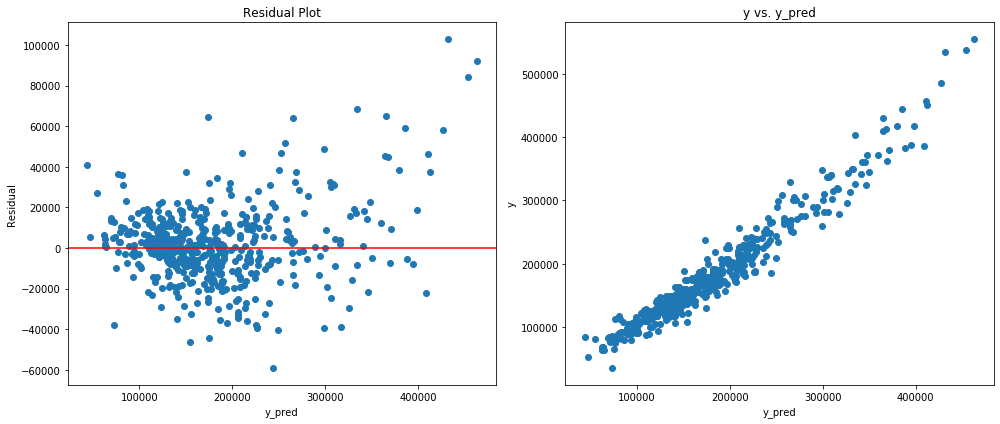

In [30]:
# Set the figure size
plt.figure(figsize=(14,6))

# Residual Plot
plt.subplot(121)
plt.scatter(y_tr_te_pred, resid)
plt.axhline(0, c='red')
plt.title('Residual Plot')
plt.xlabel('y_pred')
plt.ylabel('Residual')

# y_pred vs. y
plt.subplot(122)
plt.scatter(y_tr_te_pred, y_tr_te)
plt.title('y vs. y_pred')
plt.xlabel('y_pred')
plt.ylabel('y')

plt.tight_layout();

In [31]:
# Features Picked by LASSO
feat_lasso = pd.DataFrame({'Feature': X_tr.columns, 'beta': lasso.coef_})
feat_lasso[['Feature','beta']].sort_values(by='beta', ascending=False)

,Feature,beta
13,gr_liv_area,23952.253883
4,overall_qual,11186.961081
6,bsmtfin_sf_1,7972.088542
9,total_bsmt_sf,5495.557381
341,exter_qual_ex,5285.054759
88,neighborhood_nridght,5113.927237
5,overall_cond,5095.817788
362,bsmt_exposure_gd,4983.226818
353,bsmt_qual_ex,4888.540392
384,kitchen_qual_ex,4632.281459
